In [21]:
#SupportVectorRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset=pd.read_csv('C:/Users/rukmi/OneDrive/Documents/ML Course/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values #all columns except the last one
y=dataset.iloc[:,-1].values #only the last column

In [23]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [24]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [25]:
# Reshaping y to 2-D for Feature Scaling
y=y.reshape(len(y),1) #first parameter in reshape is no. of rows and second is no. of columns
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
#X_train[:,3:]=sc.fit_transform(X_train[:,3:])
#X_test[:,3:]=sc.fit_transform(X_test[:,3:])
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [27]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [28]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [29]:
#Now that X and y are in the same scale usually between [-3,3]
#Training SVR model on the whole dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\rukmi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [30]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)) #Since it is been tranied on the scaled values
#we are transforming 6.5 to scaled value and predict.
#To get the final value, we have to inverse transform the obtained scaled value corresponding to y.

array([[170370.0204065]])

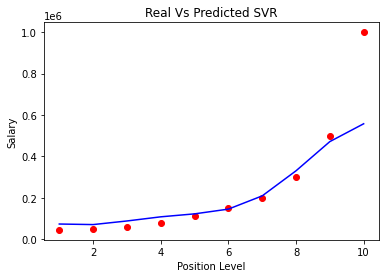

In [43]:
#Visualization
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="red") # X vs Real y
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color="blue") # X vs Predicted y
plt.title('Real Vs Predicted SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

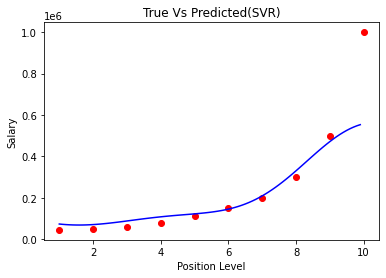

90

In [49]:
#For high resolution and Smooth curve
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('True Vs Predicted(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()